In [1]:
import pandas as pd
import seaborn as sns

import os
login = os.getlogin( )
DATA_BASE = f"/home/{login}/Git/tcr/data/"
FIGURES_BASE = f"/home/{login}/Git/tcr/notebooks/notebooks.classification/figures/"
# To run in github checkout of vibtcr, after `unzip data.zip` ...
DATA_BASE = os.path.join('..', '..', 'data')
#RESULTS_BASE = os.path.join('.', 'results')
FIGURES_BASE = os.path.join('.', 'figures')

df_b = pd.read_csv(os.path.join(DATA_BASE, "alpha-beta-splits", "beta.csv"))
df_ab = pd.read_csv(os.path.join(DATA_BASE, "alpha-beta-splits", "alpha-beta.csv"))
df_mhc = pd.read_csv(os.path.join(DATA_BASE, "mhc", "peptide-mhc.csv"))
df_nh = pd.read_csv(os.path.join(DATA_BASE, "vdjdb", "vdjdb-2021-09-05", "mouse-macaco.csv"))

In [2]:
import matplotlib.pyplot as plt
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

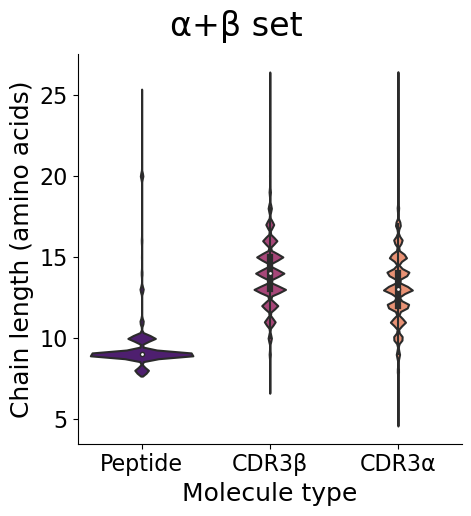

In [3]:
#alpha+beta set
sns.set_palette('magma', 3)
sequences = df_ab.peptide.to_list() + df_ab.tcrb.to_list() + df_ab.tcra.to_list()
label = ['Peptide']*len(df_ab) + ['CDR3β']*len(df_ab) + ['CDR3α']*len(df_ab)

df = pd.DataFrame({'Sequence': sequences, 'Molecule type': label})
df['Chain length (amino acids)'] = df['Sequence'].apply(lambda x: len(x))
plot = sns.catplot(data=df, y='Chain length (amino acids)', x='Molecule type', kind='violin')
plot.fig.suptitle("α+β set", y=1.04)
plt.savefig(os.path.join(FIGURES_BASE, "violins-alpha-beta.svg"), format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(FIGURES_BASE, "violins-alpha-beta.png"), format='png', dpi=300, bbox_inches='tight')

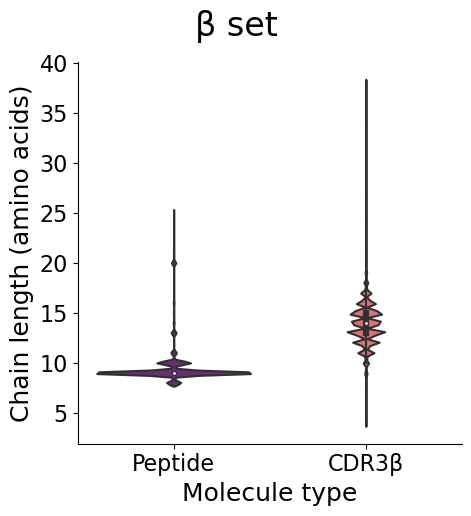

In [4]:
#beta set
sns.set_palette('magma', 2)
sequences = df_b.peptide.to_list() + df_b.tcrb.to_list()
label = ['Peptide']*len(df_b) + ['CDR3β']*len(df_b)

df = pd.DataFrame({'Sequence': sequences, 'Molecule type': label})
df['Chain length (amino acids)'] = df['Sequence'].apply(lambda x: len(x))
plot = sns.catplot(data=df, y='Chain length (amino acids)', x='Molecule type', kind='violin')
plot.fig.suptitle("β set", y=1.04)
plt.savefig(os.path.join(FIGURES_BASE, "violins-beta.svg"), format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(FIGURES_BASE, "violins-beta.png"), format='png', dpi=300, bbox_inches='tight')

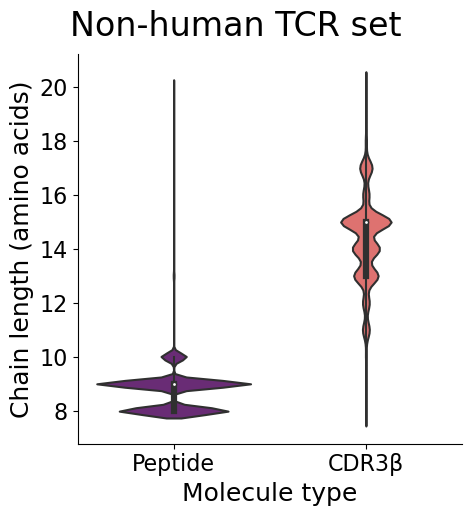

In [5]:
#non-human TCR set
sns.set_palette('magma', 2)
sequences = df_nh.peptide.to_list() + df_nh.tcrb.to_list()
label = ['Peptide']*len(df_nh) + ['CDR3β']*len(df_nh)

df = pd.DataFrame({'Sequence': sequences, 'Molecule type': label})
df['Chain length (amino acids)'] = df['Sequence'].apply(lambda x: len(x))
plot = sns.catplot(data=df, y='Chain length (amino acids)', x='Molecule type', kind='violin')
plot.fig.suptitle("Non-human TCR set", y=1.04)
plt.savefig(os.path.join(FIGURES_BASE, "violins-non-human.svg"), format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(FIGURES_BASE, "violins-non-human.png"), format='png', dpi=300, bbox_inches='tight')

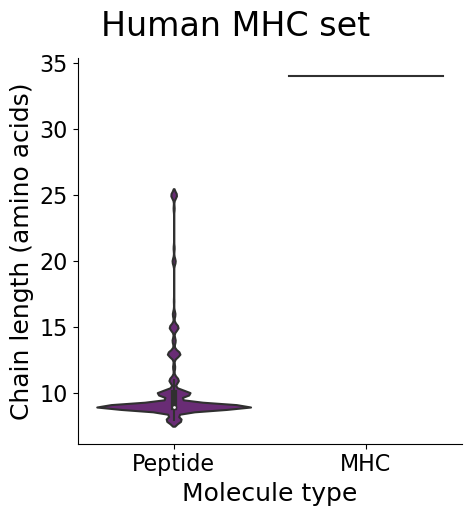

In [6]:
#human MHC set
sns.set_palette('magma', 2)
sequences = df_mhc.peptide.to_list() + df_mhc.mhc.to_list()
label = ['Peptide']*len(df_mhc) + ['MHC']*len(df_mhc)

df = pd.DataFrame({'Sequence': sequences, 'Molecule type': label})
df['Chain length (amino acids)'] = df['Sequence'].apply(lambda x: len(x))
plot = sns.catplot(data=df, y='Chain length (amino acids)', x='Molecule type', kind='violin')
plot.fig.suptitle("Human MHC set", y=1.04)
plt.savefig(os.path.join(FIGURES_BASE, "violins-mhc.svg"), format='svg', dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(FIGURES_BASE, "violins-mhc.png"), format='png', dpi=300, bbox_inches='tight')